In [291]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn as skl
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from keras._tf_keras.keras.preprocessing.text import Tokenizer
from keras._tf_keras.keras.preprocessing.sequence import pad_sequences
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Embedding, LSTM, Dense, Dropout

# Adjust display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (use with caution for large DataFrames)
pd.set_option('display.width', None)        # Adjust console width to fit all columns
pd.set_option('display.max_colwidth', None) # Show full content of each column

Put the data into correct columns and rows

In [292]:
file_path = r"D:\IIT\2nd Year\CM2604 ML\Coursework\bank-additional\bank-additional-full.csv"

# Create the CSV file data into correct columns
data = pd.read_csv(file_path, delimiter=';', quotechar='"')
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Try to get and idea about dataset

In [293]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [294]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

Check if the data unbalance or not

<BarContainer object of 2 artists>

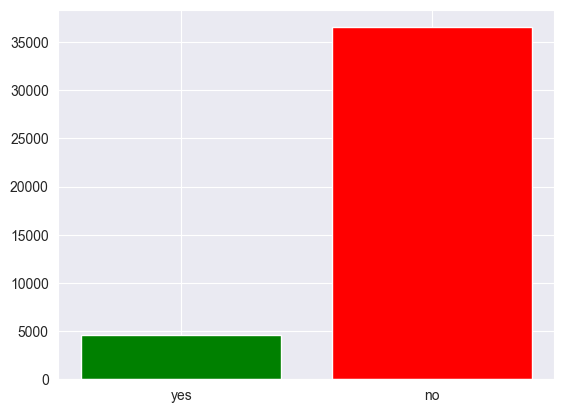

In [295]:

no_count = (data['y'] == 'no').sum()

yes_count = (data['y'] == 'yes').sum()

# plot the data unbalance
y = [yes_count,no_count]
x = ['yes','no']
plt.bar(x,y,color = ['green','red'])

Check the categorical features distribution

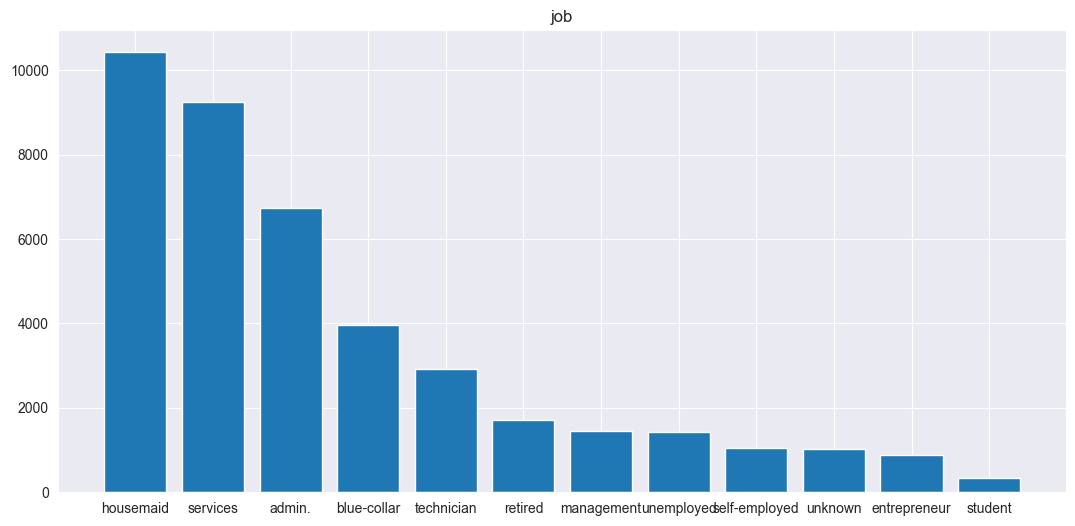

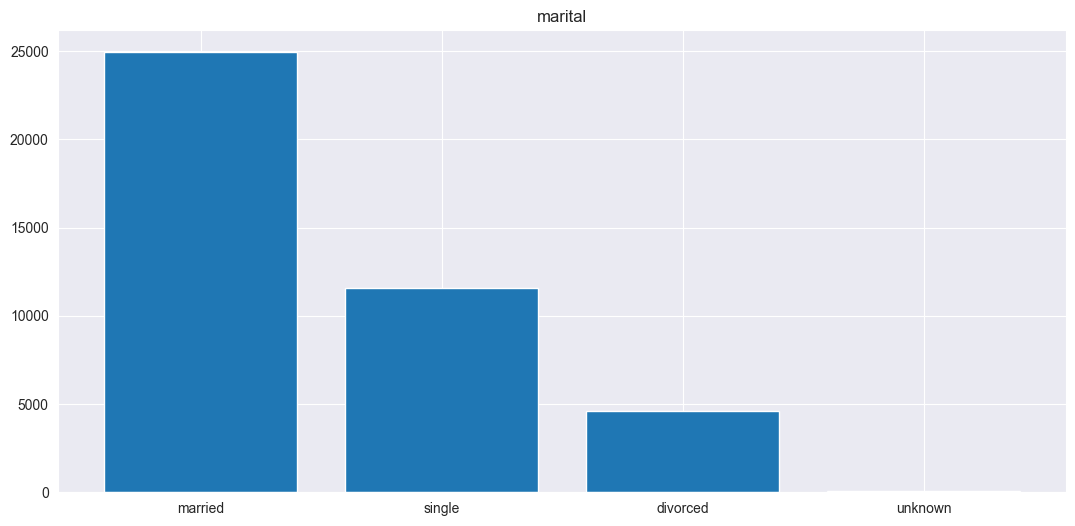

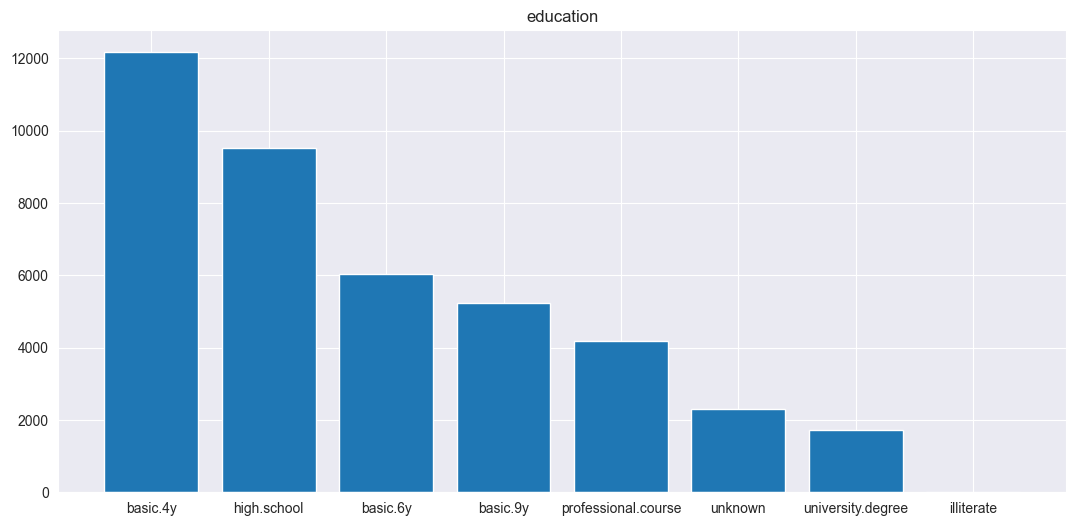

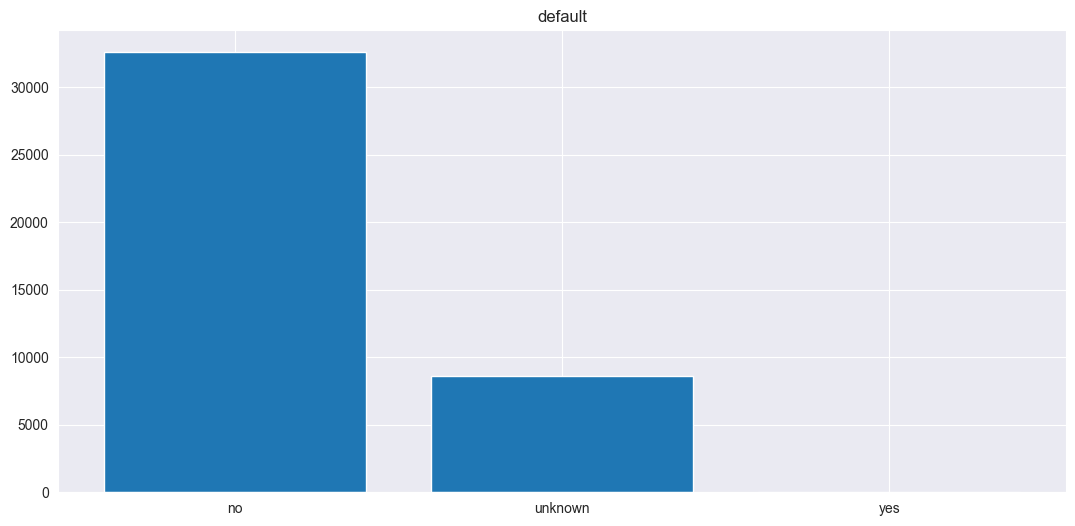

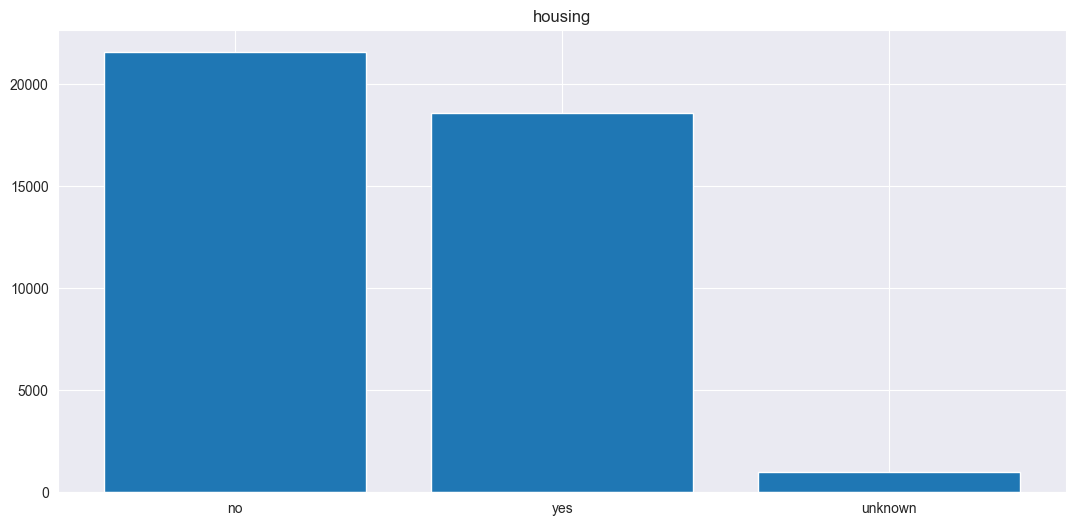

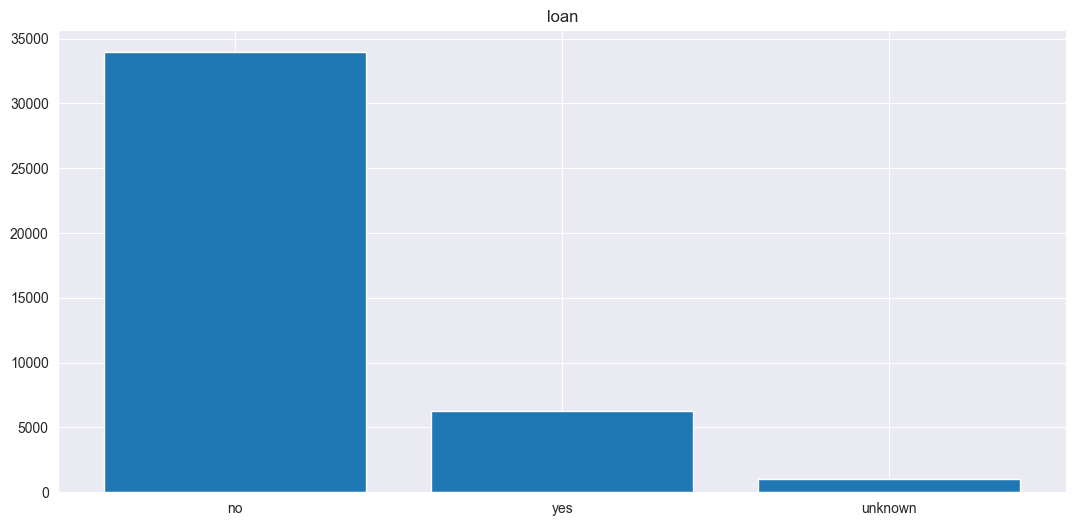

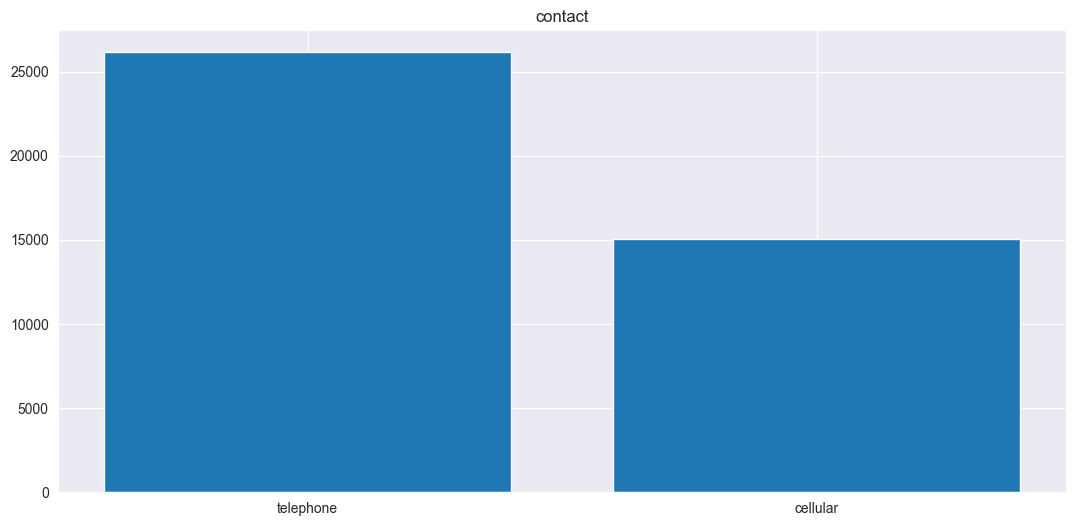

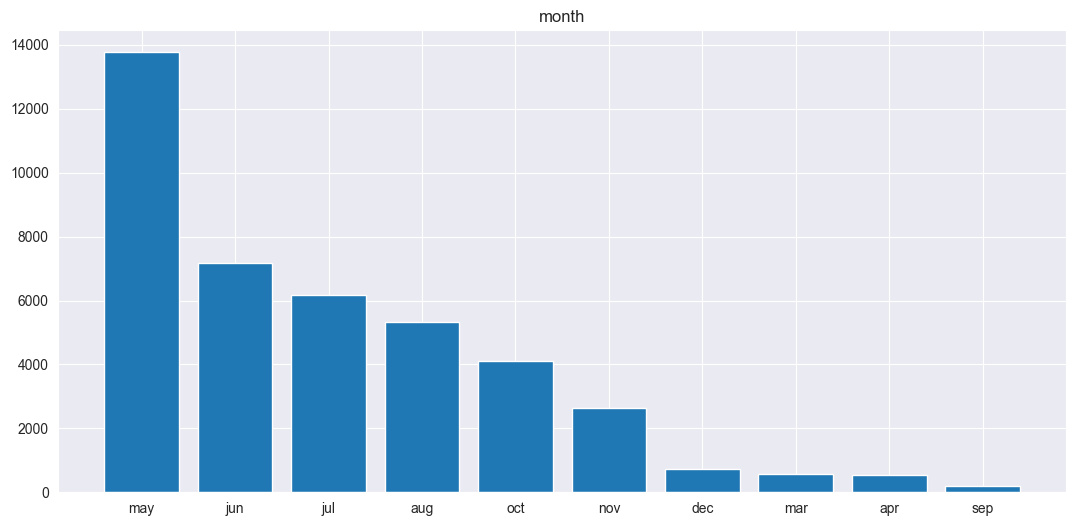

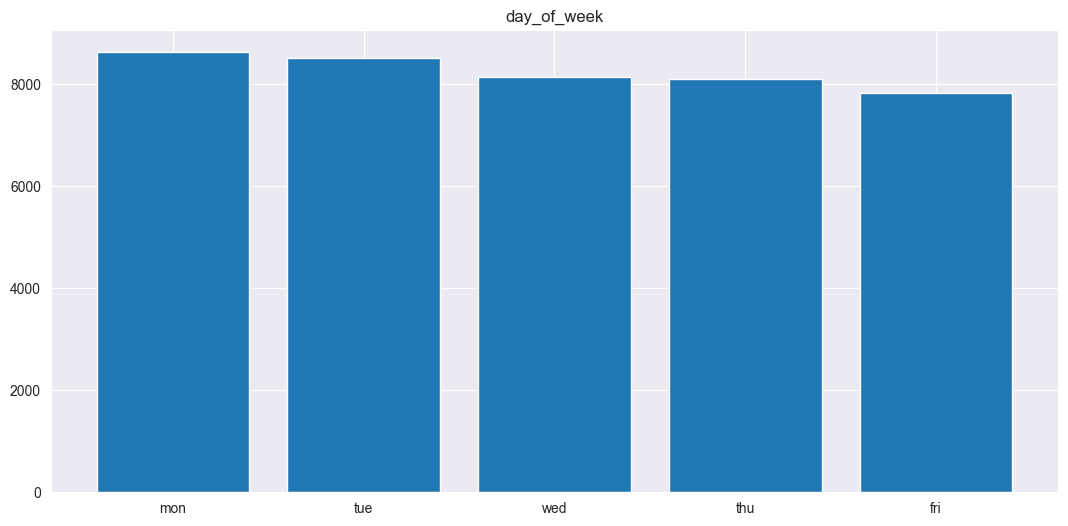

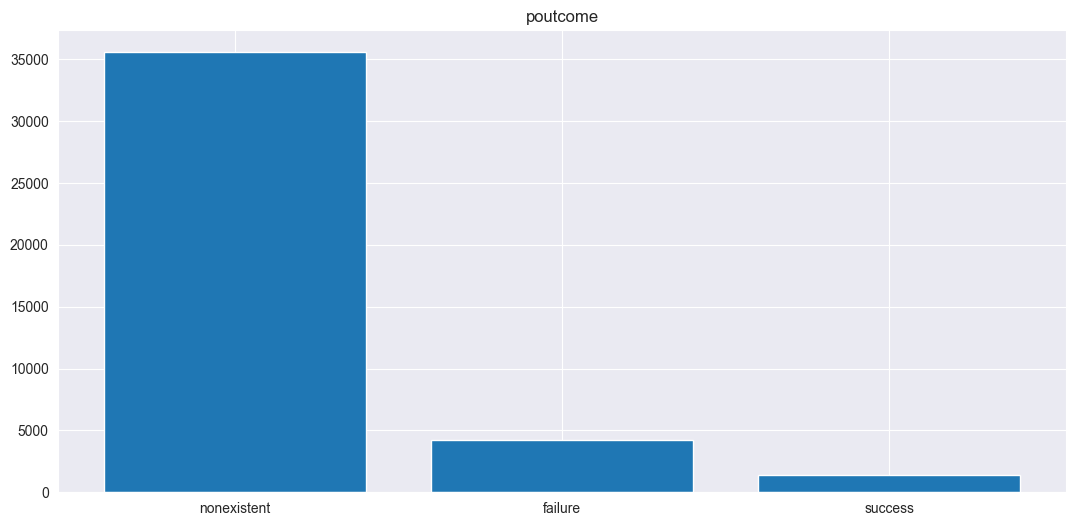

In [296]:

cat_features = []
for col in data.select_dtypes(include=object).columns:
    cat_features.append(col)

#removes the target column
cat_features.pop(-1)
cat_features

for cat_feature in cat_features:
    x = data[cat_feature].unique()
    y = data[cat_feature].value_counts()
    plt.figure(figsize=(13,6))
    plt.title(cat_feature)
    plt.bar(x,y)
    plt.show()

Relationship between categorical features and output

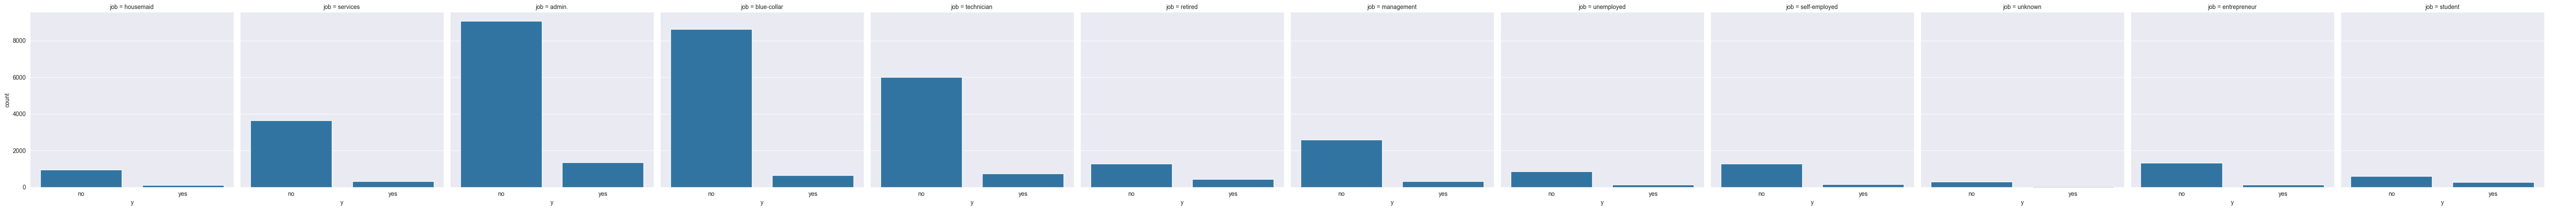

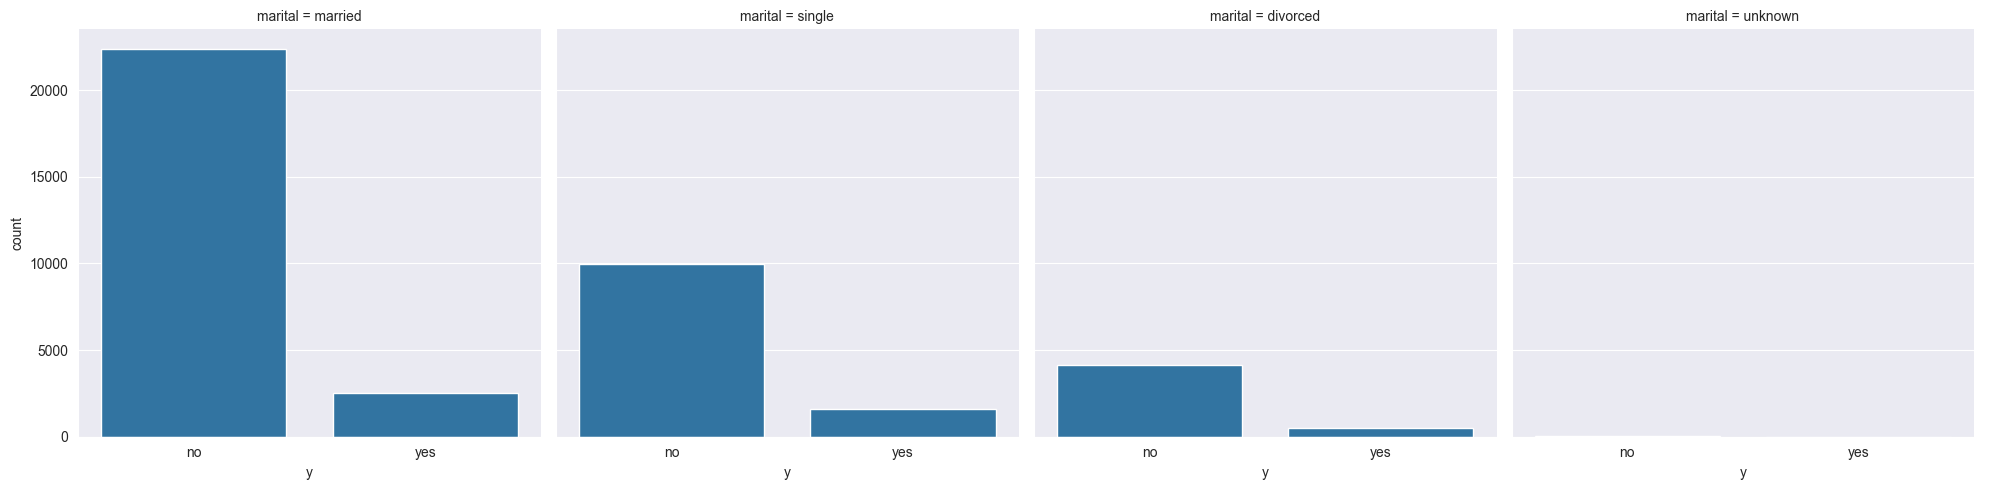

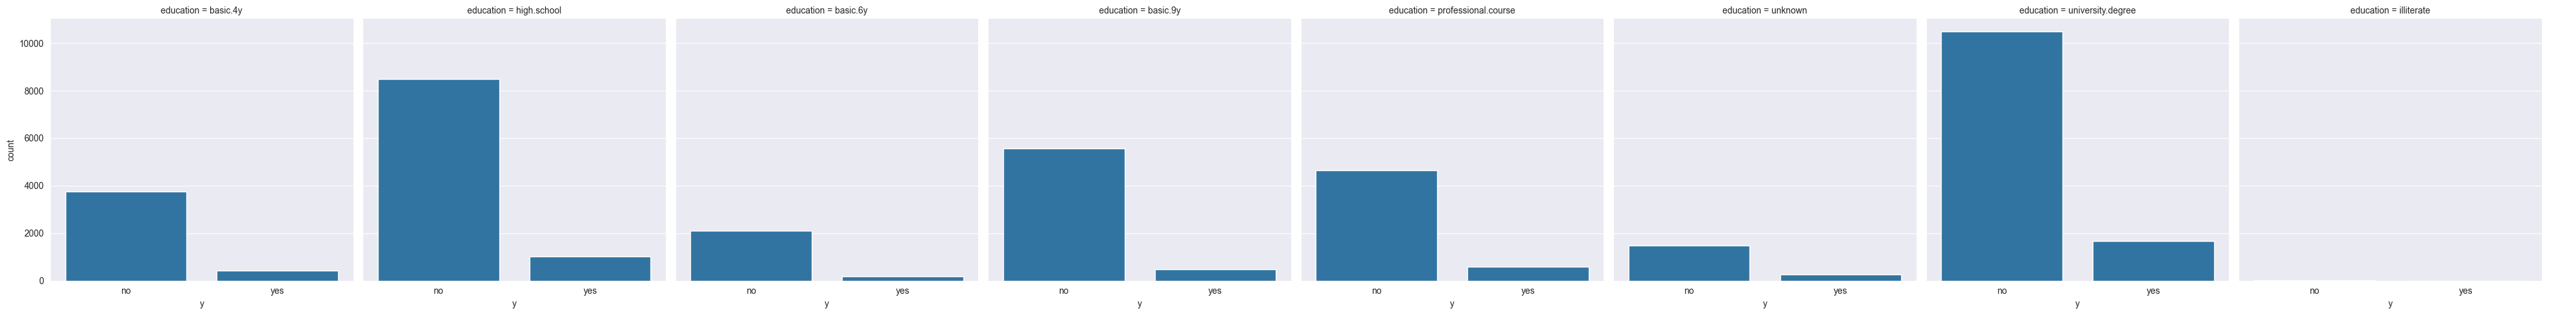

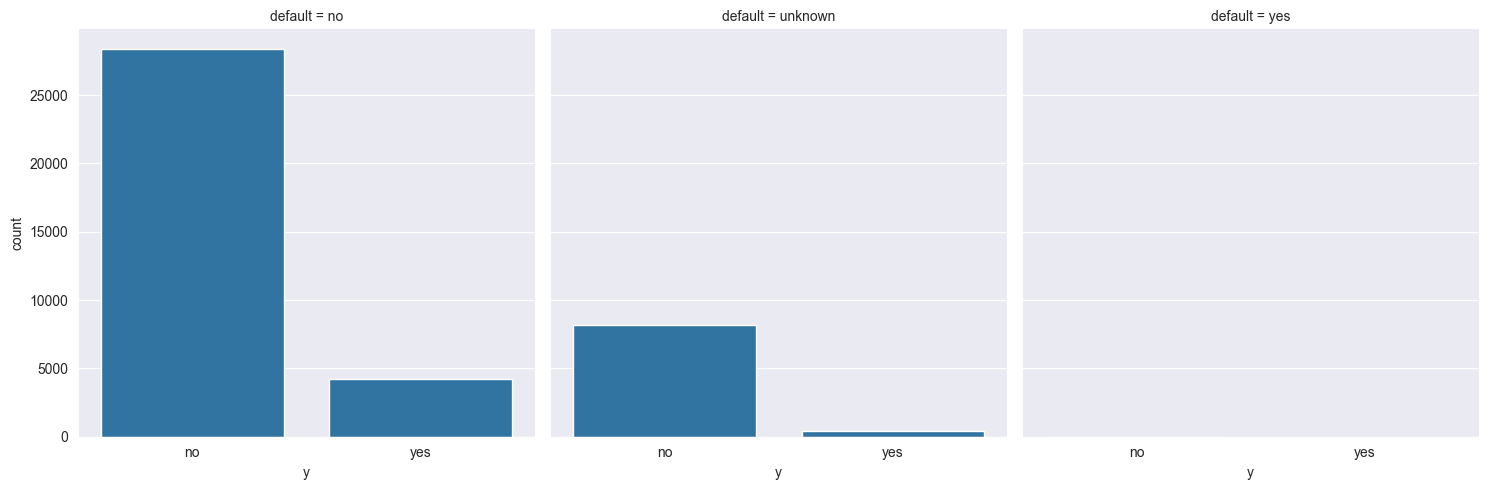

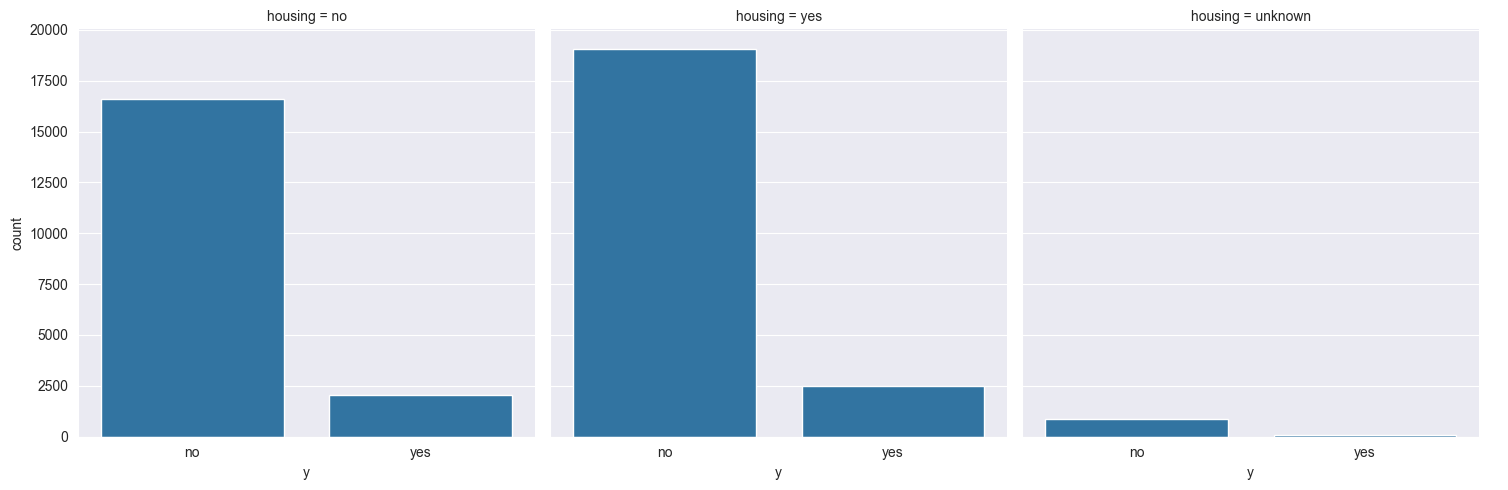

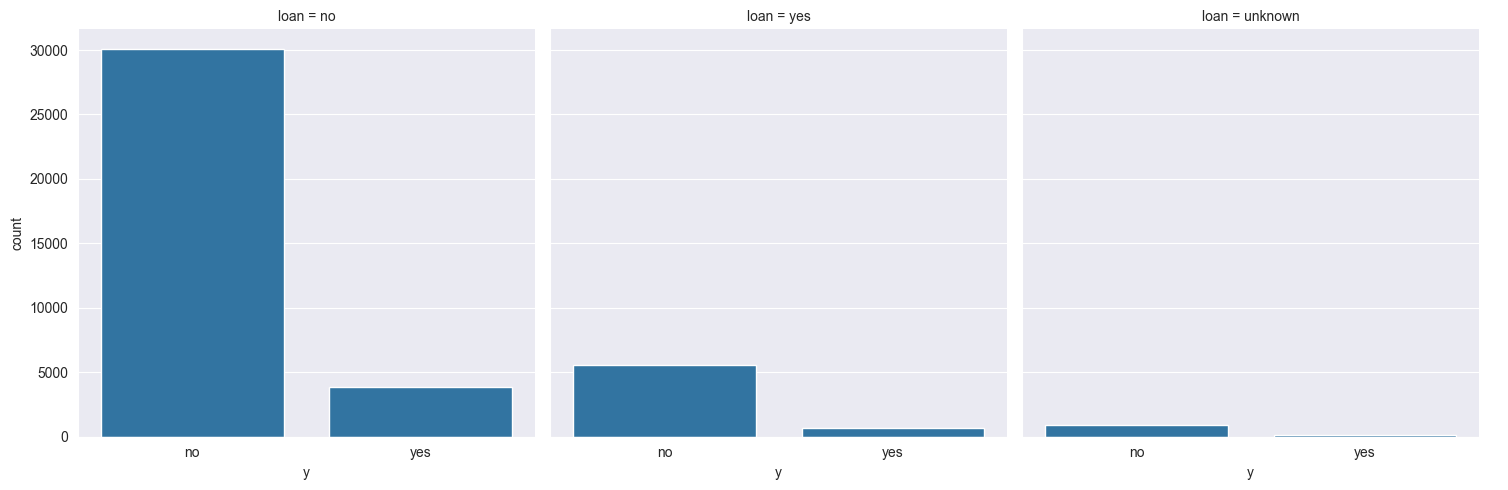

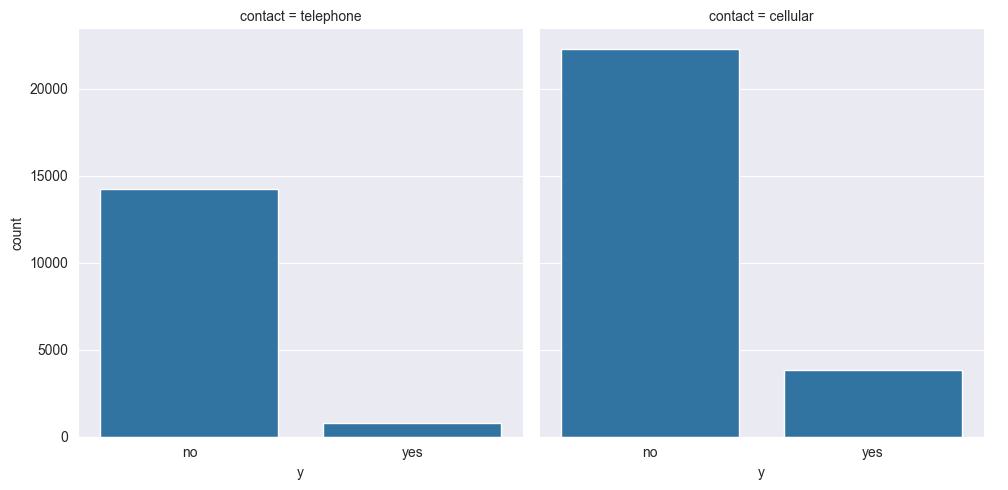

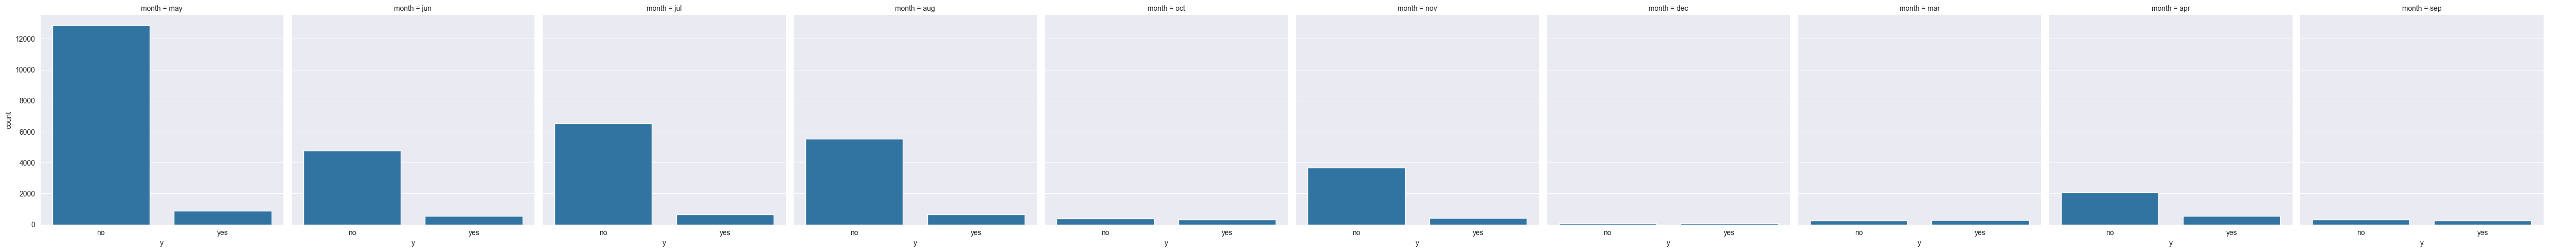

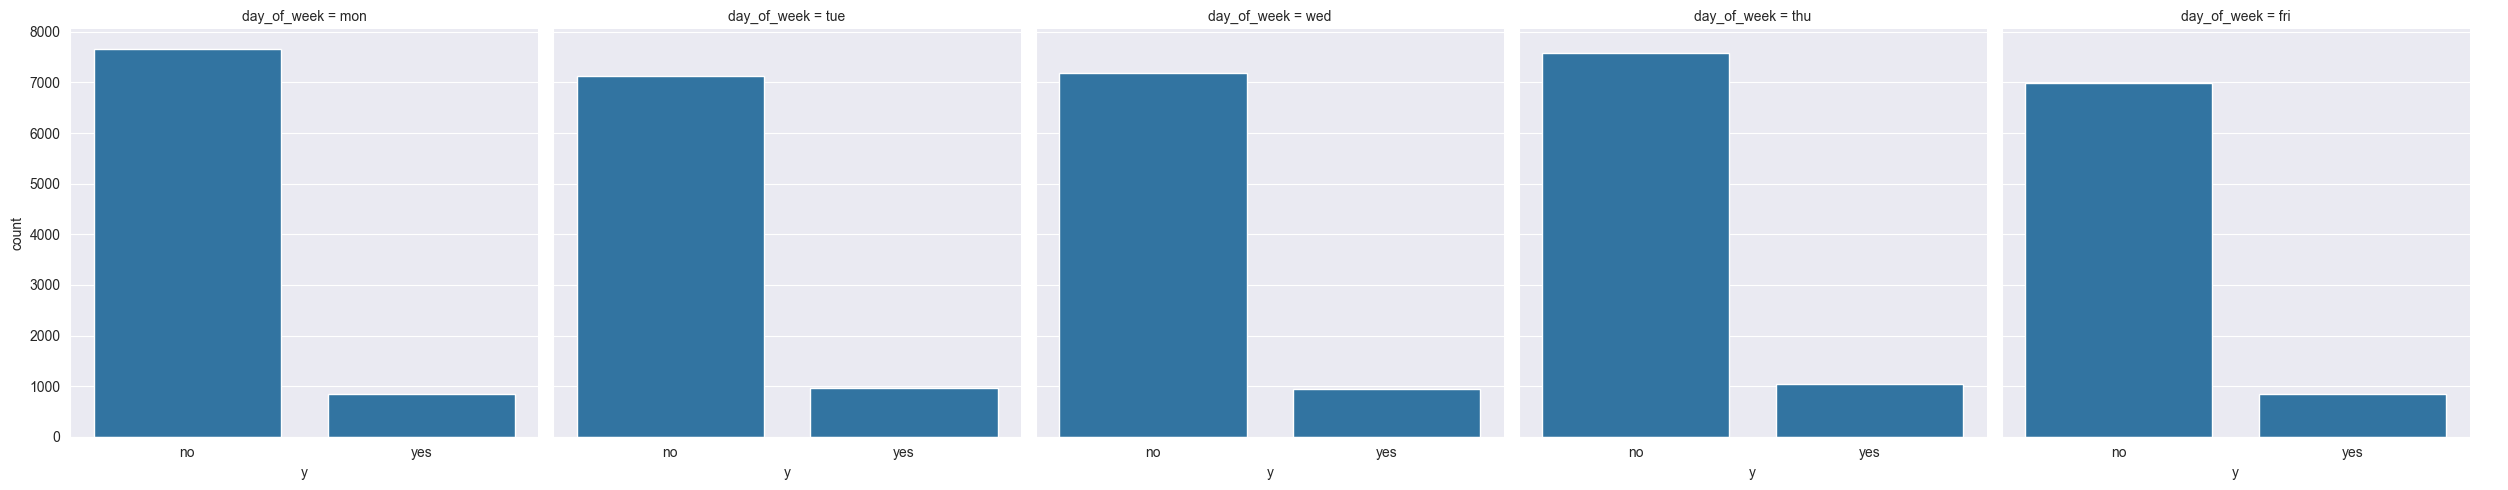

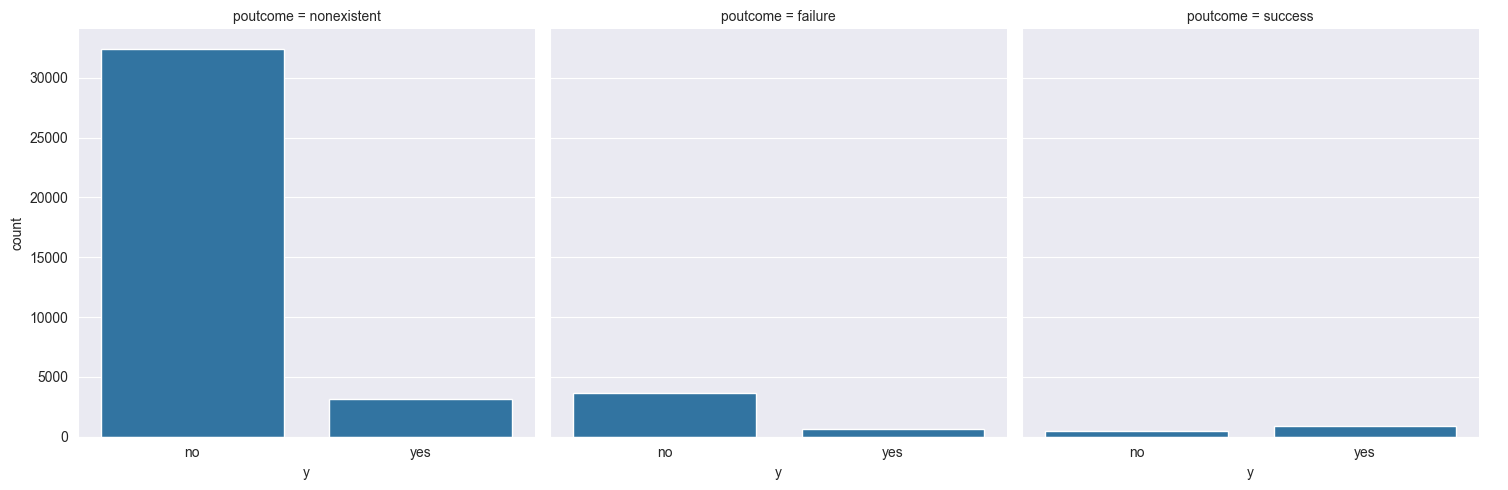

In [336]:
for cat_feature in cat_features:
    sns.catplot(x='y',col=cat_feature ,kind='count',data=data )

In [298]:
for cat_feature in cat_features:
    print(data.groupby(['y',cat_feature]).size())
    print(f"Maximum value :{data.groupby(['y',cat_feature]).size().max()}")
    print(f"Minimum value :{data.groupby(['y',cat_feature]).size().min()}")

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
Maximum value :9070
Minimum value :37
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
Maximum value :22396
Minimum value :12
y    education          
no   ba

Analysing the numerical features

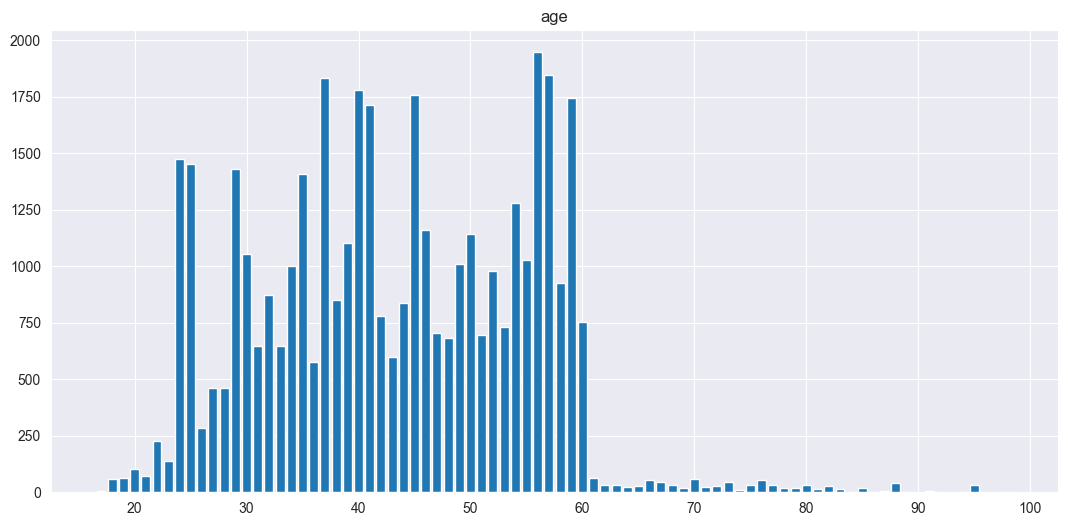

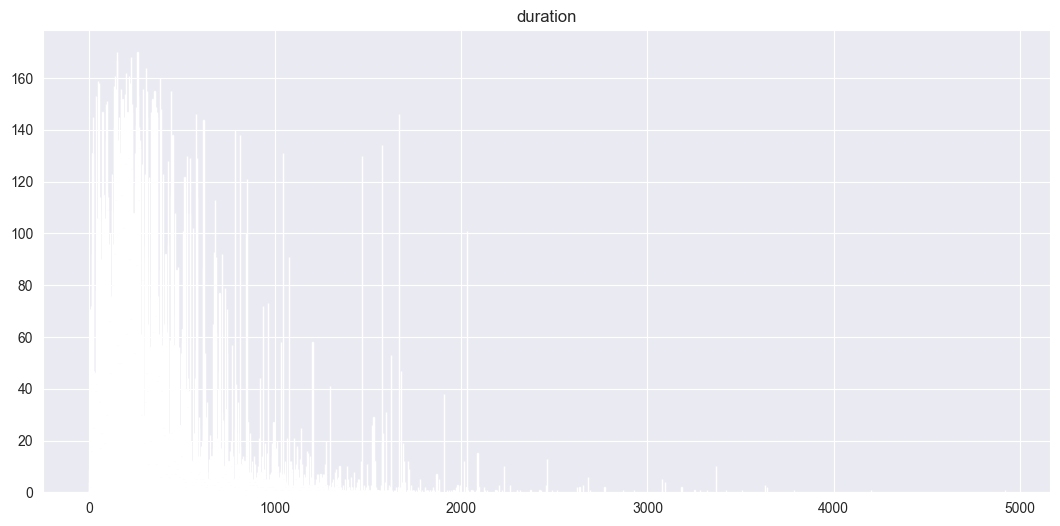

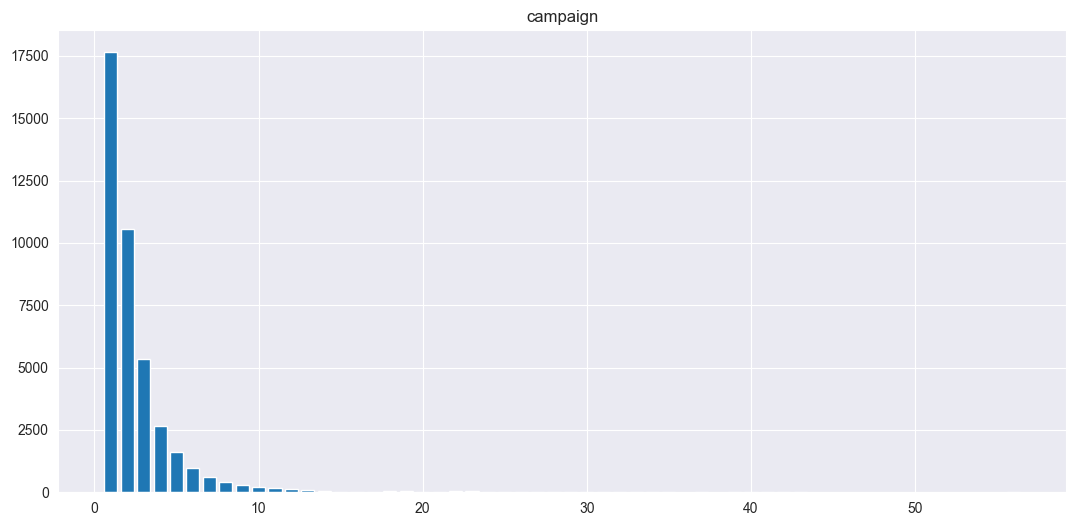

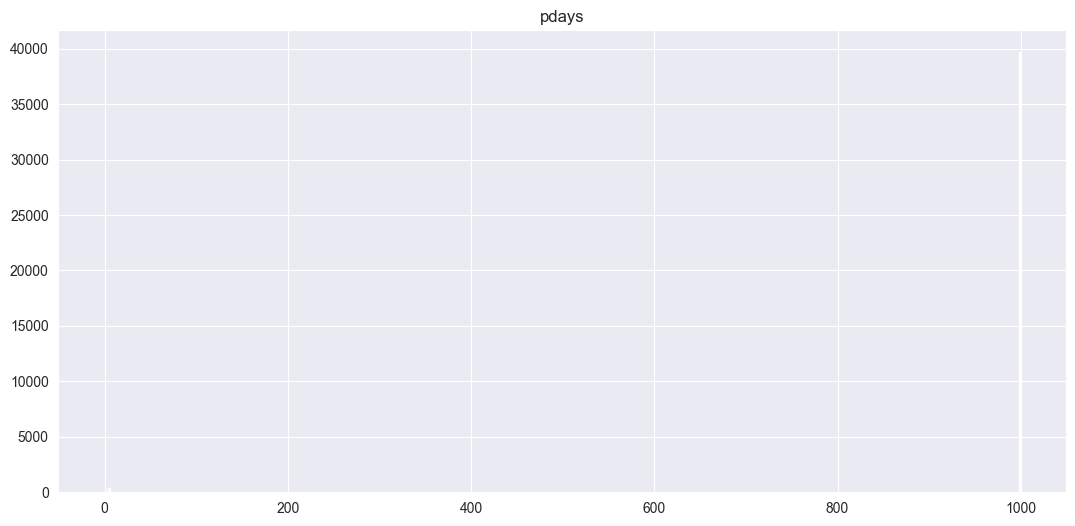

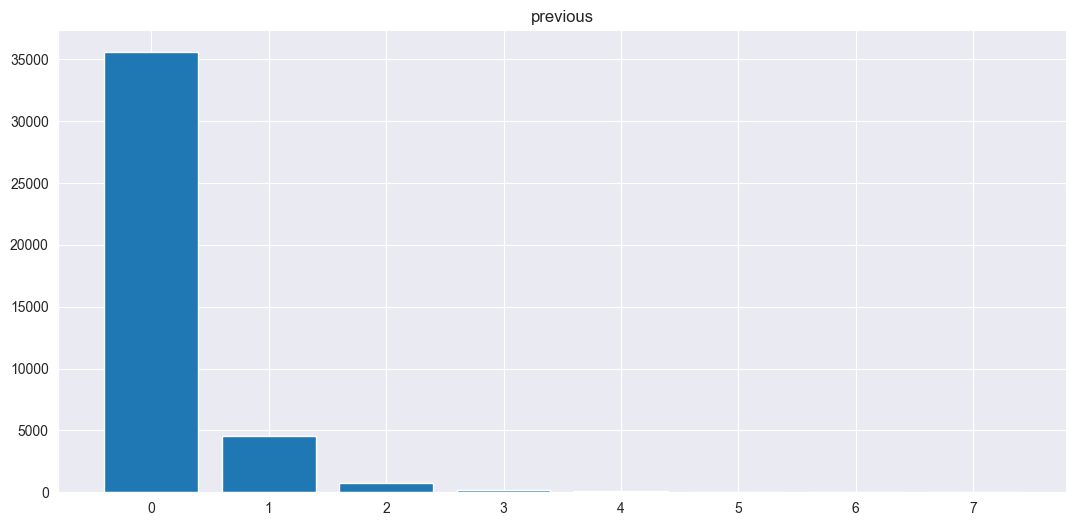

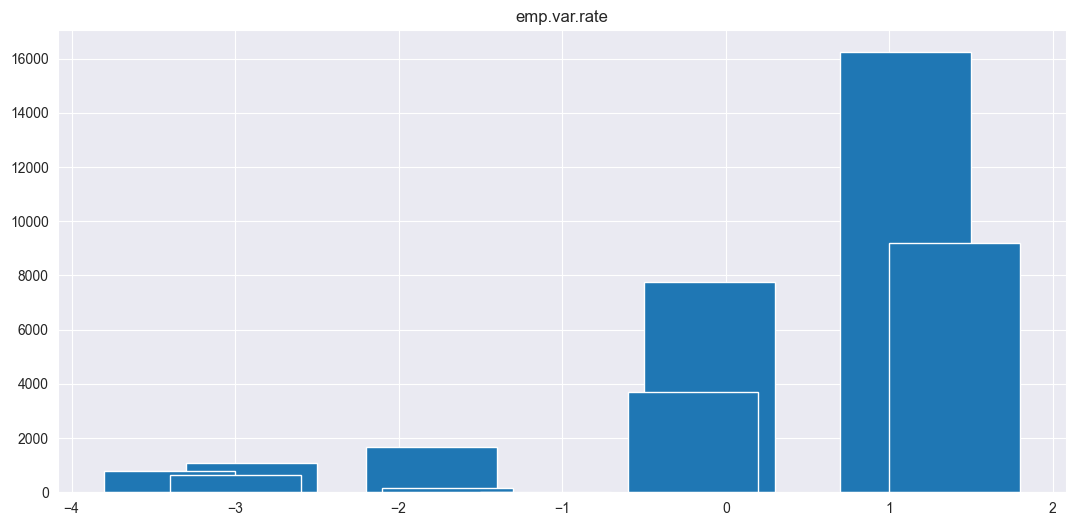

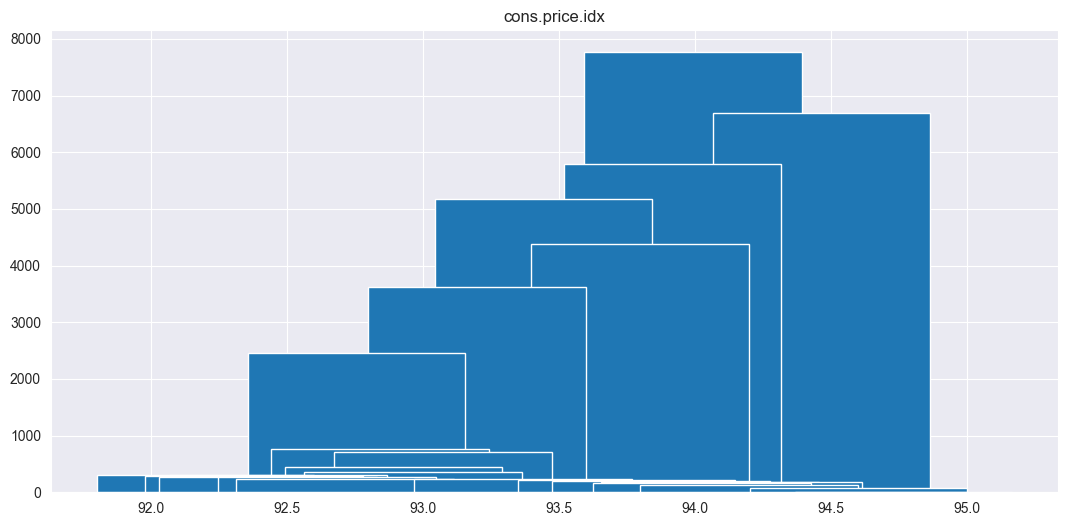

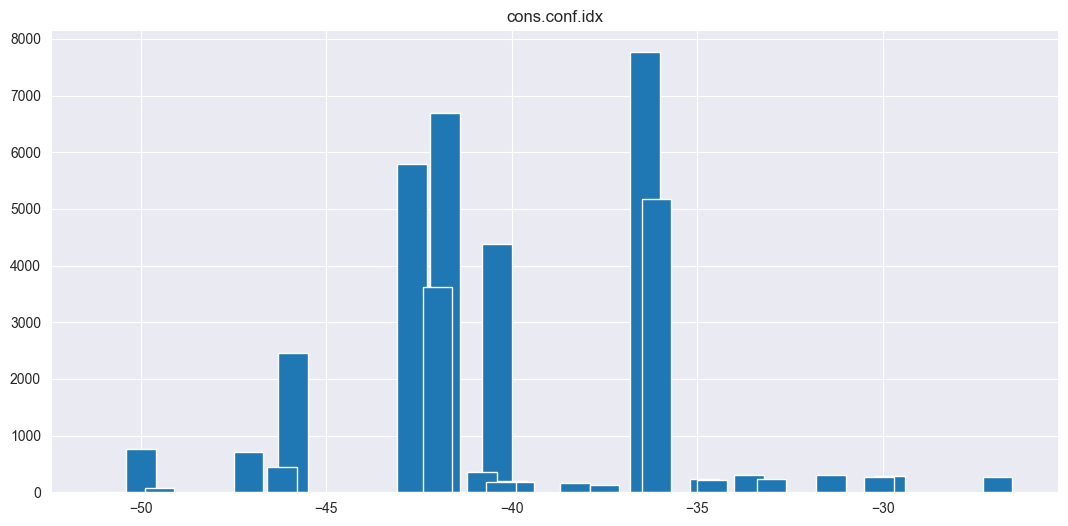

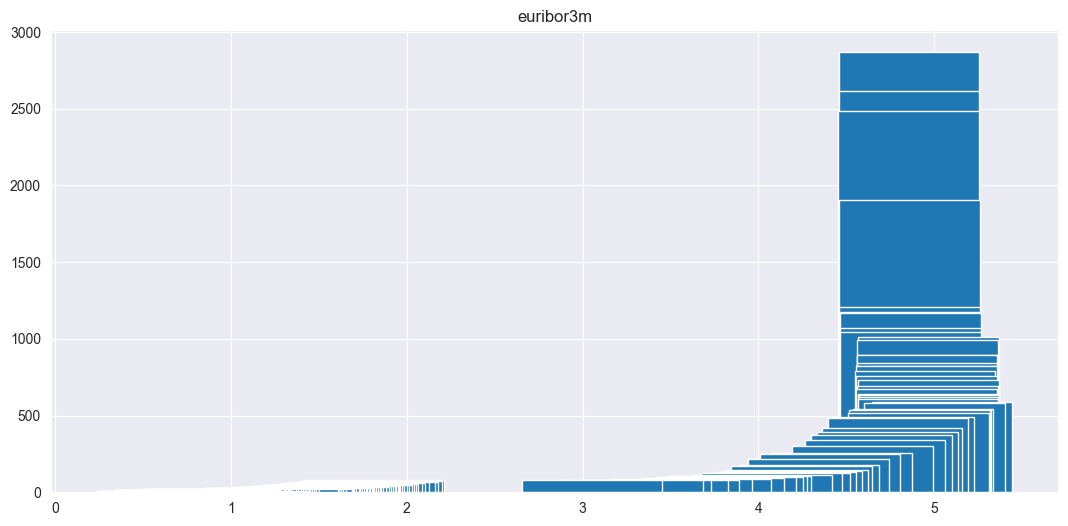

In [339]:
num_features = []
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    num_features.append(col)

#removes the target column
num_features.pop(-1)
num_features

for num_feature in num_features:
    x = data[num_feature].unique()
    y = data[num_feature].value_counts()
    plt.figure(figsize=(13,6))
    plt.title(num_feature)
    plt.bar(x,y)
    plt.show()

Checking for correlations

<Axes: >

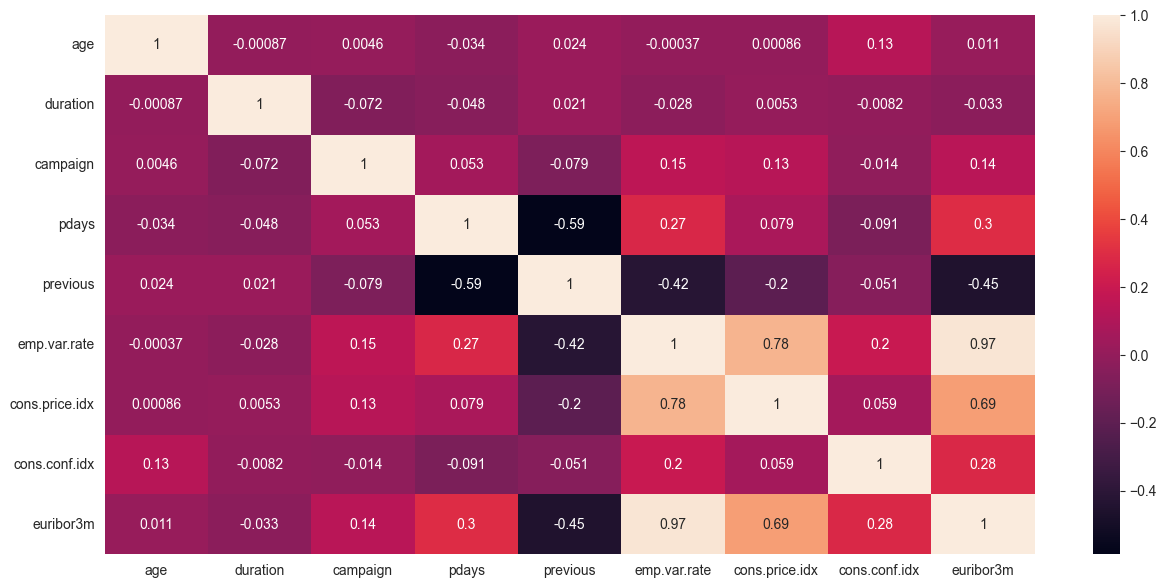

In [300]:
cor_matrix = data[num_features].corr(method="pearson")
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_matrix,annot=True)

Copy the data frame and starts to preprocess the dataset

In [301]:
df = data.copy()
df.shape

(41188, 21)

Drop the default feature because it is not doing much for the predictions

In [302]:
df.groupby(['y','default']).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

in here You can see out of 45211 raws 44 396 raws says "No" so that means this is more acts like single valued feature

In [303]:
df.drop(['default'],inplace=True,axis=1)
df.shape

(41188, 20)

Drop the pdays column because most of it values has -1

In [304]:
df.groupby(['y','pdays']).size()

negative_one_count = (df['pdays'] == 999).sum()
other_pdays = (df['pdays'] != -1).sum()
print((negative_one_count))


39673


In here there is more than 80 percenet of values has -1

In [305]:

df.drop(['pdays'],inplace=True,axis=1)
df.shape

(41188, 19)

check the outliers for age

In [306]:
df.groupby(['y','age'],sort=True)['age'].count()

y    age
no   17        3
     18       16
     19       22
     20       42
     21       73
     22      101
     23      178
     24      377
     25      505
     26      576
     27      737
     28      850
     29     1267
     30     1512
     31     1727
     32     1662
     33     1623
     34     1561
     35     1592
     36     1626
     37     1338
     38     1264
     39     1318
     40     1077
     41     1165
     42     1051
     43      967
     44      934
     45     1011
     46      951
     47      870
     48      882
     49      784
     50      788
     51      682
     52      698
     53      665
     54      620
     55      592
     56      624
     57      584
     58      518
     59      394
     60      225
     61       41
     62       37
     63       38
     64       30
     65       21
     66       28
     67       15
     68       18
     69       20
     70       28
     71       32
     72       21
     73       21
     74       17
     

Check the outliers for balance

In [307]:
df.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            23

Handle the categorical features

In [308]:
bool_cat = ['y','housing','loan']

for col in bool_cat:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,1,0,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,1,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [309]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [340]:
cat_columns = ['job','marital','education','contact','month','poutcome']

for col in cat_columns:
    df = pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)],axis=1)

df.head()
df.info


KeyError: "['job'] not found in axis"

In [311]:
exclude_cols = ['age','balance','housing','loan','day_of_week','duration','campaign','previous','y','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']

for col in df.columns:
    if col not in exclude_cols:
         df[col] = df[col].apply(lambda x: 1 if x is True else 0)
mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df['day_of_week'] = df['day_of_week'].replace(mapping)
df.head()

[1 2 3 4 5]


C:\Users\Chethaka\AppData\Local\Temp\ipykernel_19968\3243916043.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['day_of_week'] = df['day_of_week'].replace(mapping)


,age,housing,loan,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0,0,1,261,1,0,0,0,0,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,57,0,0,1,149,1,0,0,0,0,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,37,1,0,1,226,1,0,0,0,0,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,40,0,0,1,151,1,0,0,0,0,4.857,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,56,0,1,1,307,1,0,0,0,0,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


Balancing the dataset

<Axes: xlabel='y'>

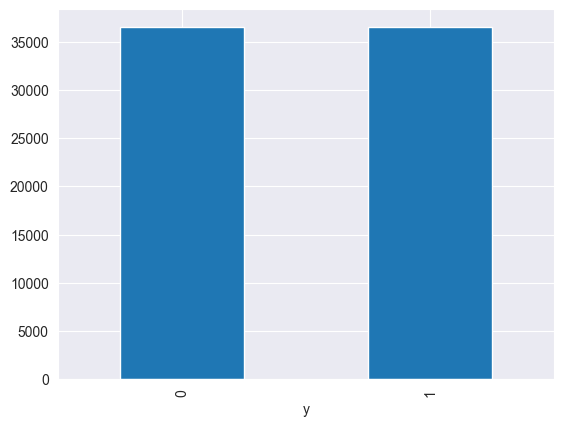

In [341]:
x = df.drop('y',axis=1)
y = df['y']

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

y_smote.value_counts().plot(kind='bar')


Split the data set into train and test

In [313]:
x_train , x_test , y_train , y_test = train_test_split(x_smote,y_smote,test_size=0.3,random_state=42)

In [314]:
x_train.shape

(51167, 45)

In [315]:
x_test.shape

(21929, 45)

Creating Random forest Model

In [316]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Checking accuracy and the f1

In [317]:
pred = model.predict(x_test)
skl.metrics.accuracy_score(y_test,pred)

0.9500205207715811

In [318]:
skl.metrics.confusion_matrix(y_test,pred)

array([[10470,   535],
       [  561, 10363]], dtype=int64)

In [319]:
skl.metrics.precision_score(y_test,pred)

0.9509084235639567

In [320]:
skl.metrics.recall_score(y_test,pred)

0.9486451849139509

In [321]:
skl.metrics.f1_score(y_test,pred)

0.9497754559618733

In [322]:
print(skl.metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11005
           1       0.95      0.95      0.95     10924

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



In [343]:
skl.metrics.roc_auc_score(y_test,pred)

0.9500154593356669

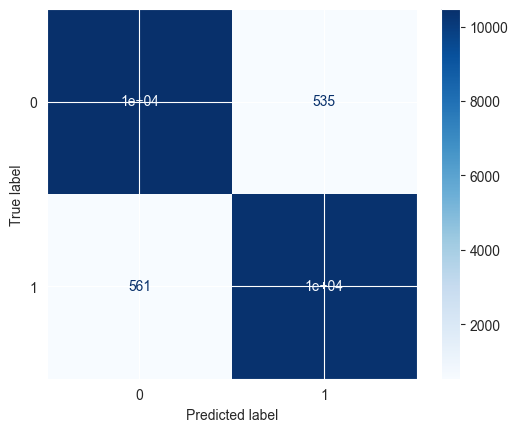

In [357]:
skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred , cmap='Blues')

In [358]:
skl.metrics.log_loss(y_test,pred)

1.8014430258777143

Training a NLP model

In [323]:
df2 = data.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Balance the data set for Neural network

In [324]:
features = df2.drop('y',axis=1)
target = df2['y']


In [325]:
def text_from_df(df):
    texts = []
    for row in df.itertuples():
        texts.append(str(row[1:]) + " .")
    return texts
texts = text_from_df(features)
texts

["(56, 'housemaid', 'married', 'basic.4y', 'no', 'no', 'no', 'telephone', 'may', 'mon', 261, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",
 "(57, 'services', 'married', 'high.school', 'unknown', 'no', 'no', 'telephone', 'may', 'mon', 149, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",
 "(37, 'services', 'married', 'high.school', 'no', 'yes', 'no', 'telephone', 'may', 'mon', 226, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",
 "(40, 'admin.', 'married', 'basic.6y', 'no', 'no', 'no', 'telephone', 'may', 'mon', 151, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",
 "(56, 'services', 'married', 'high.school', 'no', 'no', 'yes', 'telephone', 'may', 'mon', 307, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",
 "(45, 'services', 'married', 'basic.9y', 'unknown', 'no', 'no', 'telephone', 'may', 'mon', 198, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",
 "(59, 'admin.', 'married', 'professio

Tokenizing the texts

In [326]:
df2['texts'] = texts
df2.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,texts
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(56, 'housemaid', 'married', 'basic.4y', 'no', 'no', 'no', 'telephone', 'may', 'mon', 261, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) ."
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(57, 'services', 'married', 'high.school', 'unknown', 'no', 'no', 'telephone', 'may', 'mon', 149, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) ."
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(37, 'services', 'married', 'high.school', 'no', 'yes', 'no', 'telephone', 'may', 'mon', 226, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) ."
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(40, 'admin.', 'married', 'basic.6y', 'no', 'no', 'no', 'telephone', 'may', 'mon', 151, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) ."
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(56, 'services', 'married', 'high.school', 'no', 'no', 'yes', 'telephone', 'may', 'mon', 307, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) ."


In [327]:
df2['label'] = data['y'].map({'no': 0, 'yes': 1})
df2.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,texts,label
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(56, 'housemaid', 'married', 'basic.4y', 'no', 'no', 'no', 'telephone', 'may', 'mon', 261, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(57, 'services', 'married', 'high.school', 'unknown', 'no', 'no', 'telephone', 'may', 'mon', 149, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(37, 'services', 'married', 'high.school', 'no', 'yes', 'no', 'telephone', 'may', 'mon', 226, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(40, 'admin.', 'married', 'basic.6y', 'no', 'no', 'no', 'telephone', 'may', 'mon', 151, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(56, 'services', 'married', 'high.school', 'no', 'no', 'yes', 'telephone', 'may', 'mon', 307, 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0) .",0


In [328]:
text_data = df2['texts']
output = df2['label']


In [329]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(text_data, output, test_size=0.2, random_state=42)
x_test2

32884                               (57, 'technician', 'married', 'high.school', 'no', 'no', 'yes', 'cellular', 'may', 'mon', 371, 1, 999, 1, 'failure', -1.8, 92.893, -46.2, 1.299, 5099.1) .
3169                               (55, 'unknown', 'married', 'unknown', 'unknown', 'yes', 'no', 'telephone', 'may', 'thu', 285, 2, 999, 0, 'nonexistent', 1.1, 93.994, -36.4, 4.86, 5191.0) .
32206                                   (33, 'blue-collar', 'married', 'basic.9y', 'no', 'no', 'no', 'cellular', 'may', 'fri', 52, 1, 999, 1, 'failure', -1.8, 92.893, -46.2, 1.313, 5099.1) .
9403                                 (36, 'admin.', 'married', 'high.school', 'no', 'no', 'no', 'telephone', 'jun', 'fri', 355, 4, 999, 0, 'nonexistent', 1.4, 94.465, -41.8, 4.967, 5228.1) .
14020                             (27, 'housemaid', 'married', 'high.school', 'no', 'yes', 'no', 'cellular', 'jul', 'fri', 189, 2, 999, 0, 'nonexistent', 1.4, 93.918, -42.7, 4.963, 5228.1) .
17201                      (58, 'retired', 'm

In [330]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train2)
X_train_seq = tokenizer.texts_to_sequences(x_train2)
X_test_seq = tokenizer.texts_to_sequences(x_test2)


Padding the sequence

In [331]:
max_length = 25
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded.__len__()

smote_2 = SMOTE(random_state=123)
text_data_smote,output_smote = smote_2.fit_resample(X_train_padded, y_train2)
x_test_smote, y_test_smote = smote_2.fit_resample(X_test_padded, y_test2)

Build Neural network model

In [332]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128,input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Chethaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [333]:
model.fit(text_data_smote,output_smote, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8657 - loss: 0.3092 - val_accuracy: 0.9561 - val_loss: 0.0811
Epoch 2/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9318 - loss: 0.1575 - val_accuracy: 0.9817 - val_loss: 0.0428
Epoch 3/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9378 - loss: 0.1383 - val_accuracy: 0.9893 - val_loss: 0.0294
Epoch 4/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9451 - loss: 0.1245 - val_accuracy: 0.9867 - val_loss: 0.0304
Epoch 5/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9437 - loss: 0.1224 - val_accuracy: 0.9938 - val_loss: 0.0145
Epoch 6/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9471 - loss: 0.1118 - val_accuracy: 0.9911 - val_loss: 0.0245
Epoch 7/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9508 - loss: 0.1039 - val_accuracy: 0.9871 - val_loss: 0.0323
Epoch 8/20
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9552 - loss: 0.0970 

In [344]:
y_pred2 = (model.predict(x_test_smote) > 0.5).astype("int32")
print("Accuracy:", skl.metrics.accuracy_score(y_test_smote, y_pred2))
print("Classification Report:\n", skl.metrics.classification_report(y_test_smote, y_pred2))

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9352320963987403
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7303
           1       0.94      0.93      0.93      7303

    accuracy                           0.94     14606
   macro avg       0.94      0.94      0.94     14606
weighted avg       0.94      0.94      0.94     14606



In [345]:
skl.metrics.roc_auc_score(y_test_smote, y_pred2)

0.9352320963987403

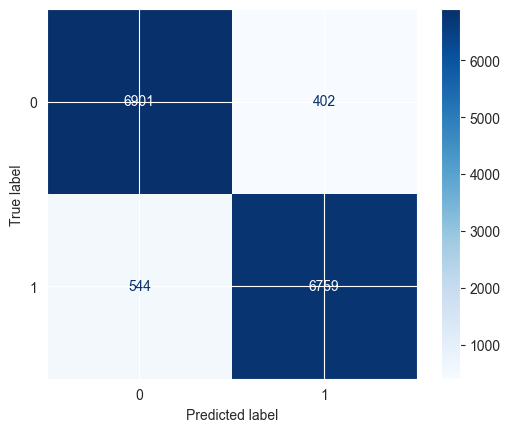

In [356]:
skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test_smote, y_pred2 , cmap='Blues')

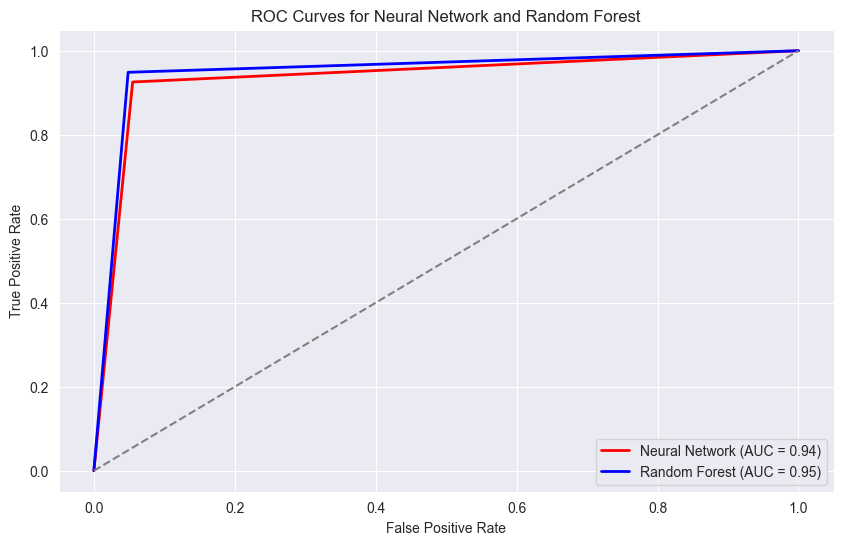

In [361]:
fpr_rf, tpr_rf, _ = skl.metrics.roc_curve(y_test, pred)
roc_auc_rf = skl.metrics.auc(fpr_rf, tpr_rf)

fpr_nn, tpr_nn, _ = skl.metrics.roc_curve(y_test_smote, y_pred2)
roc_auc_nn = skl.metrics.auc(fpr_nn, tpr_nn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network and Random Forest')
plt.legend(loc="lower right")
plt.show()